# Exercício 02
## Exploração de Dados
### Grupo:
### Alunos:

- 
- 
-

## Dados unidimensionais
 
Suponha dois conjuntos de dados, que representam as notas finais em uma dada disciplina de duas salas com 100 alunos. Os dados foram armazenados nos arquivos "notas_salas01.txt" e "notas_salas02.txt". 

Imagine que uma pessoa deseje comparar o desempenho das salas de aula. Considera-se que, **quanto mais alunos foram aprovados, melhor o desempenho da sala**. Suponha que para ser aprovado, um aluno deve ter nota maior que 50. 

Como medida inicial de desempenho, essa pessoa calculou a média dos dados através do código abaixo:

In [91]:
import numpy as np
import pandas as pd
from scipy import stats

In [92]:
salas = []
salas.append(np.loadtxt("notas_sala01.txt"))
salas.append(np.loadtxt("notas_sala02.txt"))

for i in range(0,2):
    print("--- Sala: %d ---" % (i+1))
    print("Média: %f" % np.mean(salas[i]))        

--- Sala: 1 ---
Média: 60.184709
--- Sala: 2 ---
Média: 55.184195


**Com base na média, a pessoa concluiu que a sala 1 obteve um melhor desempenho que a sala 2.**

### Questão 01. 
Demonstre o porquê dessa conclusão estar equivocada.
   - Sugestão: Transforme as estruturas `salas[0]` e `salas[1]` em estruturas do tipo `DataFrame` da biblioteca **pandas** e utilize as funções de histograma e/ou boxplot.

In [93]:
import matplotlib.pyplot as plt
# Seu codigo aqui
def carrega_salas():
    salas = []
    salas.append(np.loadtxt("notas_sala01.txt"))
    salas.append(np.loadtxt("notas_sala02.txt"))
    return salas

def plotSalas():
    salas = carrega_salas()
    for i in range(0,2):
        salas_df = pd.DataFrame(salas[i])
        boxplot_df = salas_df.boxplot()
        boxplot_df.plot()
        plt.show()
        
#Nota-se que no primeiro plot existe valores extremos (outliers) que afetam diretamente a medição da média aritmética
#Tornando assim, ela um método pouco eficiente no cálculo de desempenho
#Veja que no primeiro plot tem valores de 100 e 0, enquanto que no segundo os valores se distribuem mais uniformementem sem extremos

In [94]:
### Questão 02.
Calcule o número de aprovados em cada uma das salas.

SyntaxError: invalid syntax (<ipython-input-94-949e3166b869>, line 2)

In [95]:
def carrega_salas(index):
    salas = []
    salas.append(np.loadtxt("notas_sala01.txt"))
    salas.append(np.loadtxt("notas_sala02.txt"))
    return salas
def num_alunos_aprovados(notas, index,  media=50):
    notas = carrega_salas(index)
    salas_df = pd.DataFrame(notas[index], columns=["notas"])
    df = salas_df[(salas_df.notas >= media)]
    return df.size
primeira_sala = carrega_salas(0)
segunda_sala = carrega_salas(1)
aprovados_1 = num_alunos_aprovados(primeira_sala,0)
aprovados_2 = num_alunos_aprovados(segunda_sala,1)
print("Aprovados na primeira sala: %d" % aprovados_1)
print("Aprovados na segunda sala: %d" % aprovados_2)

Aprovados na primeira sala: 68
Aprovados na segunda sala: 90


### Base Futebol

Suponha que uma emissora de televisão te contratou para analisar o perfil dos jogadores do futebol europeu para que os narradores possam dizer estatísticas sobre eles durante os jogos.

Os dados estão numa planilha chamada `players_sampled.csv`, onde cada linha contém os dados de um jogador e cada coluna possui um atributo. Essa base foi adaptada do site de competições de ciência de dados chamado [Kaggle](*https*://www.kaggle.com/hugomathien/soccer).

In [96]:
# Carregando a base
df = pd.read_csv('players_sampled.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  350 non-null    int64  
 1   player_api_id       350 non-null    int64  
 2   player_name         350 non-null    object 
 3   player_fifa_api_id  350 non-null    int64  
 4   birthday            350 non-null    object 
 5   height              350 non-null    float64
 6   weight              350 non-null    int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 19.3+ KB


### Questão 03
Para cada atributo da base, identifique quais são categoricos/nominais, ordinais, intervalares e racionais. (Não precisa ser em código)


In [97]:
    #id é ordinal
    #player_api_id é ordinal
    #player_fifa_api_id é ordinal
    #player_name é nominal
    #birthday é intervalar
    #height é racional
    #weight é racional

### Questão 4

Formule 3 hipóteses sobre a base ou seus atributos que possam ser verificadas com os conceitos apresentados na disciplina.

Ex: O atributo altura tem mais valores abaixo da média (obliquidade negativa)


-   Hipótese 1

-   Hipótese 2

-   Hipótese 3




### Questão 5

Verifique se suas hipóteses são verdadeiras

A hipotese 1 é verdadeira? Verdade
A mediana do peso: 168
A média do peso: 168
A hipotese 2 é verdadeira? True
Simetria da curva da altura: -0.12008
A hipotese 3 é verdadeira? True


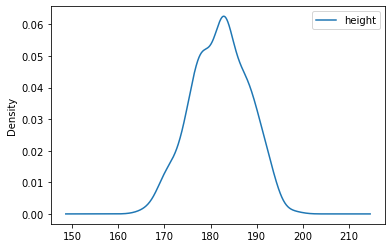

In [99]:
import matplotlib.pyplot as plt
#Hipoteses
'''
h1:O atributo peso tem mais valores acima da media (obliquidade positiva) 
h2:A mediana do peso é igual ou muito próximo a media
h3:O atributo altura é assimetrica a esquerda
'''
def test(b1,b2):
    if(b1.size > b2.size):
        return "Verdade"
    else: 
        return "Falsa"
    
def h1(df):
    df = df.drop(columns=['id', 'player_api_id', 'player_fifa_api_id', 'birthday','height'])
    df_sem_filtro = df[(df.weight < 168)]
    df_com_filtro = df[(df.weight > 168)]
    print("A hipotese 1 é verdadeira? %s" % test(df_com_filtro,df_sem_filtro))

def h2(df):
    df = df.drop(columns=['id', 'player_api_id', 'player_fifa_api_id', 'birthday'])
    df_median = df['weight'].median()
    df_average = df['weight'].mean()
    dist = abs(df_average - df_median)
    print("A mediana do peso: %d" % df_median)
    print("A média do peso: %d" % df_average)
    print("A hipotese 2 é verdadeira? %s" % (dist > 0 and dist < 1))
    

def h3(df):
    df = df.drop(columns=['id', 'player_api_id', 'player_fifa_api_id', 'birthday', 'weight'])
    df.plot(kind='kde')
    simetria = df['height'].skew()
    print("Simetria da curva da altura: %.5f" % simetria)
    print("A hipotese 3 é verdadeira? %s" % (simetria < 0))
    plt.show()
    
h1(df)
h2(df)
h3(df)


### Questão 6
- Os pesos dos jogadores foram dados em libras. Transforme os pesos dos jogadores para quilos e substitua o valor antigo da coluna no DataFrame. Dica: 1 lb = 0.45359237 kg

- Crie um novo atributo chamado "age" (idade) a partir da data de nascimento do jogador. Este atributo deve ser considerado nas próximas questões. A idade deve ser um número inteiro.

In [100]:
KG = 0.45359237
df = pd.read_csv('players_sampled.csv')
def lb_para_kg(df):
    df['weight'] = df['weight'].apply(lambda lb: lb*KG)
    return df.head(20)
lb_para_kg(df)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,530,167285,Alireza Haghighi,191589,1988-05-02 00:00:00,193.04,79.832257
1,8608,184536,Philippe Coutinho,189242,1992-06-12 00:00:00,170.18,68.038855
2,7752,38947,Mustapha Jarju Alasan,178374,1986-07-18 00:00:00,182.88,81.193034
3,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,69.853225
4,8427,27613,Paulinho,164256,1986-01-10 00:00:00,175.26,72.121187
5,6259,67360,Luca Radice,221640,1987-04-09 00:00:00,180.34,69.853225
6,3485,37753,Francis Dickoh,130933,1982-12-13 00:00:00,187.96,84.821773
7,87,495841,Adalberto Penaranda,231638,1997-05-31 00:00:00,182.88,78.017888
8,10862,67941,Xavier Chen,158260,1983-10-05 00:00:00,175.26,68.946040
9,3142,199916,Ezequiel Adrian Cirigliano,199666,1992-01-24 00:00:00,172.72,71.214002


In [101]:
# A biblioteca calendar ou a datetime podem te ajudar
from datetime import date
def calc_idade(df):
    data_nasc = df['birthday']
    dt = pd.to_datetime(data_nasc)
    dt_ano = dt.apply(lambda x: x.year)
    dt_mes = dt.apply(lambda x: x.month)
    dt_dia = dt.apply(lambda x: x.day)
    hoje = date.today()
    df['age'] = (hoje.year - dt_ano) - int(((hoje.month, hoje.day) < (dt_mes.all(), dt_dia.all())))
    return df
novo_df = calc_idade(df)
novo_df.head(10)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,age
0,530,167285,Alireza Haghighi,191589,1988-05-02 00:00:00,193.04,79.832257,33
1,8608,184536,Philippe Coutinho,189242,1992-06-12 00:00:00,170.18,68.038855,29
2,7752,38947,Mustapha Jarju Alasan,178374,1986-07-18 00:00:00,182.88,81.193034,35
3,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,69.853225,42
4,8427,27613,Paulinho,164256,1986-01-10 00:00:00,175.26,72.121187,35
5,6259,67360,Luca Radice,221640,1987-04-09 00:00:00,180.34,69.853225,34
6,3485,37753,Francis Dickoh,130933,1982-12-13 00:00:00,187.96,84.821773,39
7,87,495841,Adalberto Penaranda,231638,1997-05-31 00:00:00,182.88,78.017888,24
8,10862,67941,Xavier Chen,158260,1983-10-05 00:00:00,175.26,68.946040,38
9,3142,199916,Ezequiel Adrian Cirigliano,199666,1992-01-24 00:00:00,172.72,71.214002,29


### Questão 7
Implemente a função que calcule o percetil de determinado atributo. (Atenção: As bibliotecas Numpy/Pandas possuem a função *quantile* você não deve usá-la em sua função). Os resultados também podem variar dependendo da implementação. Tente seguir a definição dos slides. 

In [102]:
def percentile(df, nome_attr, pct):
    tam_attr = len(df[nome_attr])
    pect = (pct)*(tam_attr+1)/100
    return pect

### Questão 08
Utilizando sua função, calcule a mediana, 1º quartil, 3º quartil do atributo altura.

In [103]:
mediana = percentile(df,'height',0.5)
quartil_1 = percentile(df,'height', 0.25)
quartil_3 = percentile(df,'height',0.75)
print("A mediana é: %.3f" % mediana)
print("O prim quartil é: %.3f" % quartil_1)
print("O terc quartil é: %.3f"% quartil_3)

A mediana é: 1.755
O prim quartil é: 0.877
O terc quartil é: 2.632


# Questão 09

Calcule os quatro momentos (média, variância, obliquidade e achatamento) dos atributos onde essas métricas fazem sentido.

  - Dica: Utilize as bibliotecas **numpy** para média (mean) e variância (variance) e **Scipy.stats** para obliquidade (skew) e achatamento (kurtosis).

In [113]:
import scipy.stats as sps
def quatro_momentos(df, nome_attr):
    media = np.mean(df[nome_attr])
    var = np.var(df[nome_attr])
    oblq = sps.skew(df[nome_attr])
    achat = sps.kurtosis(df[nome_attr])

    print("A media é: %.3f" % media)
    print("A variança é: %.3f" % var)
    print("A obliquiedade é: %.3f" % oblq)
    print("O achatamento é: %.3f" % achat)
   
print("---Idade---")
quatro_momentos(novo_df, "age")
print("---Peso---")
quatro_momentos(novo_df, "weight")
print("---Altura---")
quatro_momentos(novo_df, "height")


---Idade---
A media é: 34.580
A variança é: 26.689
A obliquiedade é: 0.298
O achatamento é: -0.370
---Peso---
A media é: 76.455
A variança é: 41.164
A obliquiedade é: 0.030
O achatamento é: -0.124
---Altura---
A media é: 182.016
A variança é: 36.581
A obliquiedade é: -0.120
O achatamento é: -0.443


### Questão 10

- Calcule o histograma e o boxplot dos atributos altura, peso e idade.
- A distribuição dos atributos possui curvatura para algum lado ou são centrados?
- A partir do Boxplot, verifique se os atributos tem outliers e justifique.

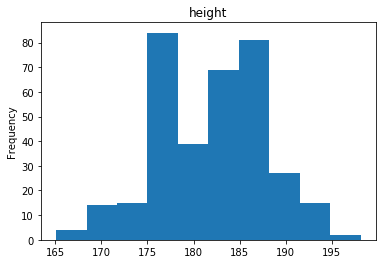

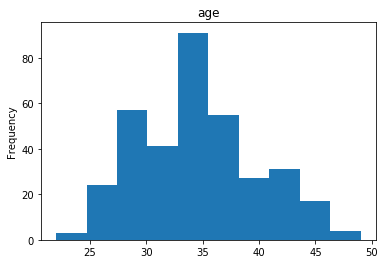

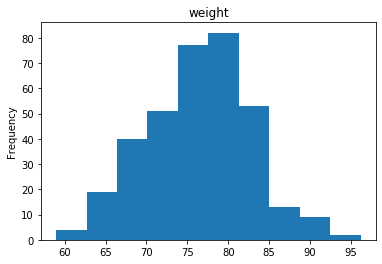

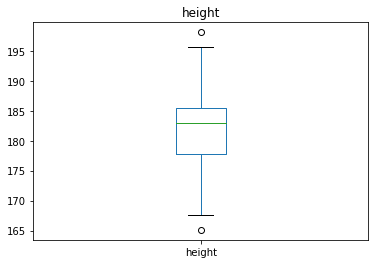

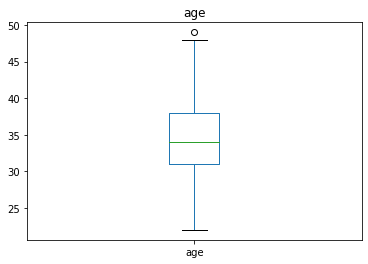

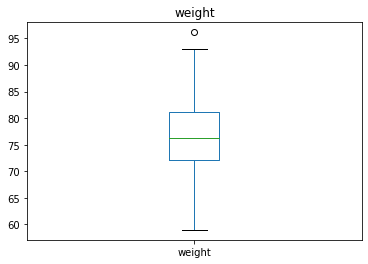

Curva: {height} Centrada para esquerda
Curva: {age} Centrada para a direita
Curva: {weight} Centrada para a direita


0.030147052872865367

In [114]:
import matplotlib.pyplot as plt
import scipy.stats as sps
def hist(nome_attr, df):
    hist_df = df[nome_attr].plot(kind='hist', title=nome_attr)
    plt.show()

def boxplot(nome_attr, df):
    box_df = df[nome_attr].plot(kind='box',title=nome_attr)
    plt.show()
    
def curv(nome_attr, df):
    simetria = sps.stats.skew(df[nome_attr])
    if(simetria < 0):
        print("Curva: {%s} Centrada para esquerda" % nome_attr)
    elif(simetria == 0):
        print("Curva: {%s} é centrada" % nome_attr)
    else:
        print("Curva: {%s} Centrada para a direita" % nome_attr)
    return simetria

hist('height', novo_df)
hist('age', novo_df)
hist('weight', novo_df)

boxplot('height', novo_df)
boxplot('age', novo_df)
boxplot('weight', novo_df)

curv('height',  novo_df)
curv('age',  novo_df)
curv('weight',  novo_df)

#Sim, existem valores discrepantes (outliers) em todos os atributos analisados, isso porque dentro do dataset
#Existem valores extremos, que não seguem o padrão de todos os outros dados, isso faz com que esse dado esteja
#Localizado fora dos limites do boxplot
#Por exemplo, muitos jovens tem em media 20 a 30 anos, entretanto existem alguns que  tem 80 anos e 0 anos
#Esses valores são valores extremos, porque não acompanham a media.